In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Лабораторная работа №6

## Вариант 1. Задание 1.

## Условие задачи

Численно и аналитически решить одну из смешанных задач для квазилинейного уравнения теплопроводности с точностью $\varepsilon = 10^{-4}$ и сравнить их значения в одиннадцати равноудаленных точках в момент времени $T = 1$

$$
\begin{equation*}
    \begin{cases}
        \dfrac{\partial U}{\partial t} = \dfrac{\partial}{\partial x} \left( U \dfrac{\partial U}{\partial x} \right), \hspace{0.5cm} 0 < t \le 1 \hspace{0.5cm} 0 < x < 1 \\
        u(0, x) = \dfrac{(1 + x)^2}{7}, \hspace{1cm} 0 \le x \le 1 \\
        u(t, 0) = \dfrac{1}{7 - 6t} \hspace{1cm} u(t, 1) = \dfrac{4}{7 - 6t}, \hspace{1cm} 0 < t \le 1
    \end{cases}
\end{equation*}
$$

# Аналитическое решение

Переменные разделяются, ищем решение в виде: $U = T(t)X(x)$

$$T'X = T^2 \frac{\partial}{\partial x} \left(X \frac{\partial X}{\partial x} \right)$$

Разделим на $T^2X$:

$$ \frac{T'}{T^2} = \frac{\frac{\partial}{\partial x} \left(X \frac{\partial X}{\partial x} \right)}{X} = -k = const $$

Рассмотрим первое уравнение:

$$ T' + kT^2 = 0 \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} T = \frac{1}{C_0 + kt}$$



Второе уравнение можно преобразовать:

$$X\frac{dX}{dx} = \frac{1}{2} \frac{dX^2}{dx} \longrightarrow \frac{d^2 (X^2)}{dx^2} + 2kX = 0$$

Будем искать частное решение в виде полинома степени не выше 2:

$$ X_{частн} = a_0 + a_1 x + a_2 x^2$$

Подставим и выпишем коэффициенты при степенях $x$:

$$
\begin{align}
    x^2 &: 4 a_2^2 + (2 a_2 + k) a_2 = 0    &\longrightarrow& \hspace{1cm} a_2 = -\frac{k}{6}  \\
    x   &: 4 a_1 a_2 + (2 a_2 + k) a_1 = 0  &\longrightarrow& \hspace{1cm} a_1 - любое \\
    1   &: a_1^2 + (2 a_2 + k) a_0 = 0      &\longrightarrow& \hspace{1cm} a_0 = -\frac{3 a_1^2}{2k}
\end{align}
$$

Пусть $a_2 = 1$, тогда $k = -6$, $a_0 = a_1^2 / 4$

$$X_{частн} = a_1^2/4 + a_1 x + x^2 = (a_1 + x)^2 $$

Получаем решение на $U$:

$$ U = \frac{(C_1 + x)^2}{C_0 - 6t} $$

А с учетом граничных условий получаем следующее аналитическое решение:

$$ U = \frac{(1 + x)^2}{7 - 6t} $$

In [2]:
def u_analytical(x, t):
    return (1 + x)**2 / (7 - 6*t)

# Численное решение

Используется неявная разностная схема:

$$
\frac{U_l^{k+1} - U_l^n}{\tau}
    = \frac{(U_{l+1}^k + U_l^k)(U_{l+1}^{k+1} - U_l^{k+1})}{2 h^2}
    - \frac{(U_l^{k+1} + U_{l-1}^{k+1})(U_l^k - U_{l-1}^k)}{2 h^2},
    \hspace{1cm} l = \overline{1, L-1}
$$

$$ U_0^n = \frac{1}{7 - 6t^n}, \hspace{1cm} U_L^n = \frac{4}{7 - 6t^n}, \hspace{1cm} U_l^0 = \frac{(1 + x)^2}{7} $$

Для решения этой системы из $L-1$ уравнений при переходе с $n$ временного слоя на $n+1$ будем использовать алгорит прогонки.

Для начала нужно свести систему к трехдиагональной матрице. Представим систему в виде:

$$ U_l^{k+1} - U_l^n = A_l(U_{l+1}^{k+1} - U_l^{k+1}) - B_l(U_l^{k+1} + U_{l-1}^{k+1}) $$

$$
\begin{align}
    A_l = \frac{\tau}{2h^2} (U_{l+1}^k + U_l^k) \\
    B_l = \frac{\tau}{2h^2} (U_{l-1}^k + U_l^k) \\
\end{align}
$$

Снова переобозначая, получаем:

$$ a_l U_{l+1}^{k+1} + b_l U_l^{k+1} + c_l U_{l-1}^{k+1} = d_l $$

где:
$$
\begin{cases}
    a_l &= \frac{\tau}{2h^2} (U_{l+1}^k + U_l^k) \\
    c_l &= \frac{\tau}{2h^2} (U_{l-1}^k + U_l^k) \\
    b_l &= -(a_l + c_l + 1)                      \\
    d_l &= -U_l^n
\end{cases}
$$

При прямом ходе прогонки сводим трехдиагональную матрицу к двухдиагональной. Прогоночное соотношение принимает следующий вид:

$$ U_l = \alpha_l U_{l+1} + \beta_l \hspace{1cm} l = \overline{1, L-1}$$

$$
\begin{cases}
    \alpha_1 &= -\dfrac{a_1}{b_1}, \hspace{1cm} &\beta_1 = \dfrac{d_1 - c_1 U_0}{b_1} \\
    \alpha_l &= -\dfrac{a_l}{b_l + c_l \alpha_{l-1}}, \hspace{1cm} &\beta_l = \dfrac{d_l - c_l \beta_{l-1}}{b_l + c_l \alpha_{l-1}}
\end{cases}
$$

Значения $U_0^n, U_L^n$ известны из граничных условий, поэтому система легко решается.

Нужно провести несколько этапов прогонки пока не достигентся нужная точность.

In [3]:
def sweep_method(u, dt, h, u_left, u_right, epsilon=1e-4):
    L = u.size
    C = dt / (2 * h**2)
    d = -u[1:-1]
    
    u_k = u
    max_diff = epsilon + 1
    
    while max_diff > epsilon:
        u0 = u_k[:-2]
        u1 = u_k[1:-1]
        u2 = u_k[2:]

        a = C * (u2 + u1)
        c = C * (u1 + u0)
        b = -(a + c + 1)
    
        # forward run
        alpha = [-a[0] / b[0]]
        beta = [(d[0] - c[0] * u_left) / b[0]]

        for l in range(1, L - 2):
            alpha.append(-a[l] / (b[l] + c[l]*alpha[l-1]))
            beta.append((d[l] - c[l]*beta[l-1]) / (b[l] + c[l]*alpha[l-1]))

        # reverse run
        u_next = np.empty(L)
        u_next[0] = u_left
        u_next[-1] = u_right
    
        for l in range(L - 2, 0, -1):
            u_next[l] = alpha[l - 1] * u_next[l + 1] + beta[l - 1]
        
        max_diff = np.max(np.abs((u_next - u_k)[1:-1] / u_next[1:-1]))
        u_k = u_next

    return u_k

# Общий ответ

In [4]:
def common_answer(L=11, N=11):
    xs, h = np.linspace(0, 1, L, retstep=True)
    ts, dt = np.linspace(0, 1, N, retstep=True)
    
    u_a = u_analytical(xs, np.ones(xs.size))

    U = np.empty(shape=(N, L))
    U[0] = (1 + xs)**2 / 7
    U_0 = 1 / (7 - 6*ts)
    U_L = 4 / (7 - 6*ts)

    for n, t in enumerate(ts[1:], 1):
        U[n] = sweep_method(U[n-1], dt, h, U_0[n], U_L[n])
    u = U[-1]
    
    step_for_output = (L - 1) // 10

    df = pd.DataFrame(
        {
            'Grid': xs[::step_for_output],
            'Model analytical': u_a[::step_for_output],
            'Model numerical': u[::step_for_output],
        }
    )
    print('Значения в 11 равноудаленных точках:\n')
    print(df.to_string(index=False))

    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.set_title(f'L={L}, N={N}')    
    ax.plot(xs, u, '-r', label='numerical solution')
    ax.plot(xs, u_a, '--k', label='analytical solution: $(1 + x)^2$')
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$U(x, t=1)$', fontsize=14)
    ax.legend()

Значения в 11 равноудаленных точках:

 Grid  Model analytical  Model numerical
  0.0              1.00         1.000000
  0.1              1.21         1.327595
  0.2              1.44         1.621458
  0.3              1.69         1.903759
  0.4              1.96         2.184122
  0.5              2.25         2.467545
  0.6              2.56         2.756890
  0.7              2.89         3.053892
  0.8              3.24         3.359647
  0.9              3.61         3.674862
  1.0              4.00         4.000000


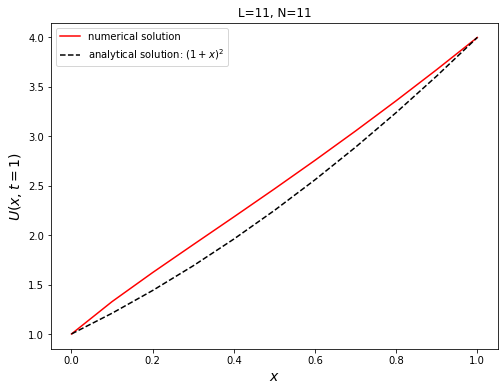

In [5]:
common_answer()

Значения в 11 равноудаленных точках:

 Grid  Model analytical  Model numerical
  0.0              1.00         1.000000
  0.1              1.21         1.214569
  0.2              1.44         1.447133
  0.3              1.69         1.698461
  0.4              1.96         1.968931
  0.5              2.25         2.258737
  0.6              2.56         2.567978
  0.7              2.89         2.896706
  0.8              3.24         3.244948
  0.9              3.61         3.612711
  1.0              4.00         4.000000


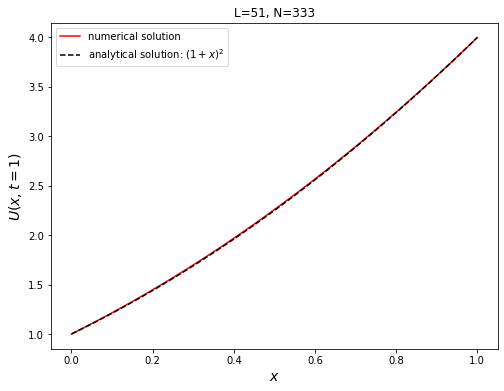

In [6]:
common_answer(L=51, N=333)